In [8]:
import pathlib
import numpy as np
import scipy.io as sio
from deeprte.utils import to_flat_dict, flat_dict_to_rte_data
from collections.abc import Mapping

In [25]:
data_path = "/workspaces/deeprte/data/rte_data/test_sin.mat"
data_path_tpfm = "/workspaces/deeprte/data/train/test_sin_1019.npz"

In [26]:
data = sio.loadmat(data_path)

np_data = np.load(data_path_tpfm)
rte_data = flat_dict_to_rte_data(np_data)

_data, _grid = rte_data["data"], rte_data["grid"]

In [27]:
data.keys()
for k,v in data.items():
    if isinstance(v, np.ndarray):
        print(k , v.shape)

phi_final (41, 41)


In [28]:
phi = (data["phi_final"][:40,:40]+data["phi_final"][1:,1:]+data["phi_final"][:40,1:]+data["phi_final"][1:,:40])/4
phi.shape

(40, 40)

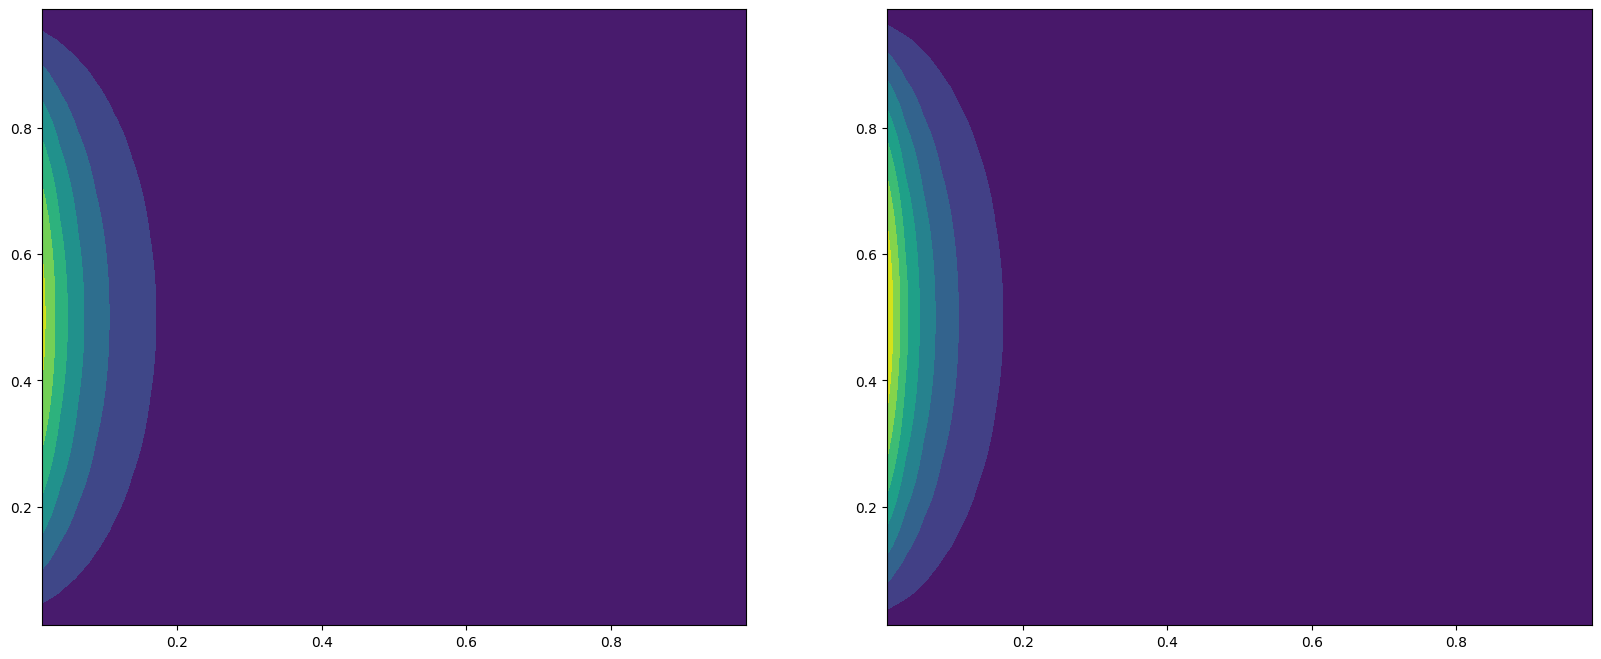

0.15099412952152674


In [29]:
import matplotlib.pyplot as plt
import plotly.express as px

id = 5
psi = _data["psi_label"][id]
phi_label = _data["phi"][id]

r = _grid["r"]

fig, _axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

fig = px.density_contour(phi)
cs_1 = axs[0].contourf(
    r[..., 0],
    r[..., 1],
    phi,
)

cs_2 = axs[1].contourf(
    r[..., 0],
    r[..., 1],
    phi_label,
)

# plt.plot(phi[:,7])
plt.show()
print(np.sqrt(np.mean((phi_label - phi)**2)/np.mean(phi_label**2)))
# print(np.allclose(np.squeeze(psi@data["omega"]),phi))

In [24]:
np.max(phi_label)

0.47252513260645923

In [6]:
from deeprte.data_convert import mat_to_np_dict
np_data = mat_to_np_dict(data,update_grid=True)

In [7]:
import tensorflow as tf
tf.nest.map_structure(lambda x: x.shape, np_data)

2022-10-16 19:29:28.725651: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-16 19:29:28.851440: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


({'sigma_t': (500, 40, 40),
  'sigma_a': (500, 40, 40),
  'psi_label': (500, 40, 40, 24),
  'phi': (500, 40, 40),
  'psi_bc': (500, 160, 12)},
 {'r': (40, 40, 2),
  'v': (24, 2),
  'w_angle': (24, 1),
  'rv_prime': (160, 12, 4),
  'w_prime': (160, 12)})